In [329]:
from collections import Counter
import re

import pandas as pd
pd.options.display.float_format = "{:,.1f}".format

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [330]:
df = pd.read_csv('tmdb_5000_movies.csv')

# <center> Визуализация данных о фильмах с IMDB

<center>Датасет ограничен фильмами с 2001 по 2016 год с бюджетом от 1000$ и количеством голосов не менее 100

In [331]:
df = df[(df.vote_count >= 100) & (df.budget >= 1000) & (pd.DatetimeIndex(df['release_date']).year > 2000)]

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 0 to 4796
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2031 non-null   int64  
 1   genres                2031 non-null   object 
 2   homepage              1127 non-null   object 
 3   id                    2031 non-null   int64  
 4   keywords              2031 non-null   object 
 5   original_language     2031 non-null   object 
 6   original_title        2031 non-null   object 
 7   overview              2031 non-null   object 
 8   popularity            2031 non-null   float64
 9   production_companies  2031 non-null   object 
 10  production_countries  2031 non-null   object 
 11  release_date          2031 non-null   object 
 12  revenue               2031 non-null   int64  
 13  runtime               2031 non-null   float64
 14  spoken_languages      2031 non-null   object 
 15  status               

In [333]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.4,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.1,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.4,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.3,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.9,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## <center>1. Plotly
### <center>1.1. Диаграмма рассеяния
#### Участвующие переменные:
    1. Бюджет фильма.
    2. Средняя оценка фильма.
#### Цель визуализации:
    Определить наличие зависимости между бюджетом фильма и его оценкой.
#### Гипотезы:
    1. 50 миллионов долларов должно быть достаточно, чтобы создать фильм, который получить отличные оценки, 
    но результат может быть абсолютно любым.
    2. С увеличнием бюджета оценки зрителей не опускаются ниже определённого уровня 
    (не ниже 4 при бюджете свыше 100 миллионов долларов, не ниже 5 при бюджете свыше 200 миллионов долларов).

In [334]:
trace = go.Scatter(
    x=df.budget,
    y=df.vote_average,
    text=df.title,
    mode = 'markers'
)

data = [trace]
layout = {'title': 'Корреляция между бюджетом фильма и его средней оценкой', 'title_x': 0.5, 
          'yaxis': {'title': 'Средняя оценка'}, 'xaxis': {'title': 'Бюджет'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

### <center>1.2. Диаграмма размаха («ящик с усами»)
#### Участвующие переменные:
    1. Средняя оценка фильма.
#### Цель визуализации:
    Определить распределение оценок
#### Гипотезы:
    1. Фильмы с оценкой выше 6.8 можно считать рекомендованными к просмотру, чего нельзя сказать
    о фильмах с оценкой ниже 5.7. 
    2. Медиана - 6.3. наивысшая оценка - 8.3, нижняя граница оценки - 4.1, но существую фильмы,
    которые оценены ещё ниже, вплоть до 2.9.
    3. Распределение оценок неравномерно, фильмы-середнячки (межквартильный размах) плотно "зажаты"
    между оценками 6.8 и 5.7, среди них незначительно преобладают фильмы с оценкой ниже медианной.

In [335]:
data = df['vote_average'].to_frame('vote_average')
fig = go.Figure()
fig.update_layout(title='Диаграмма размаха оценок фильмов с 2001 по 2016 год', title_x=0.5)
fig.update_yaxes(title='Средняя оценка')
fig.add_trace(go.Box(y=data.vote_average, name='Диаграмма оценок', boxmean=True))
fig.show()

## <center>2. Seaborn
### <center>2.1. Гистограмма
#### Участвующие переменные:
    1. Месяц выхода фильма.
    2. Количество фильмов в этот месяц за 16 лет.
#### Цель визуализации:
    Определить равномерность выхода фильмов.
#### Гипотезы:
    1. В сентябре выходит больше всего фильмов.
    2. В ноябре выходит меньше всего фильмов.

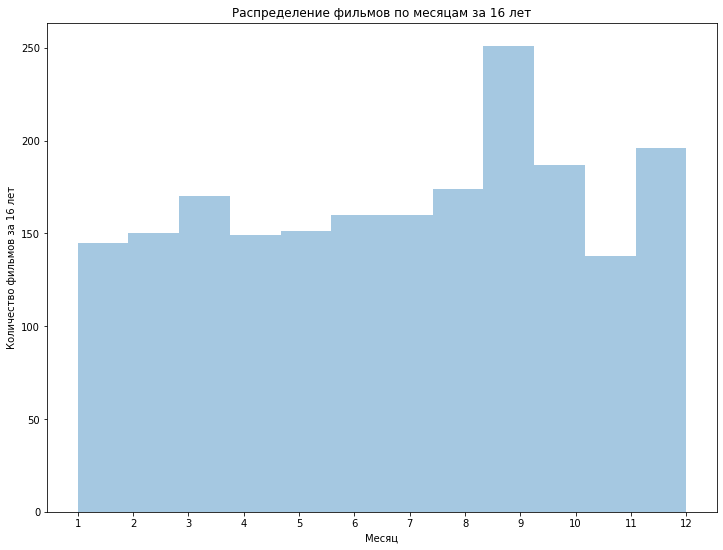

In [336]:
plt.title('Распределение фильмов по месяцам за 16 лет')
plt.ylabel('Количество фильмов за 16 лет')
plt.xticks([x for x in range(1,13)])
sns.distplot(pd.DatetimeIndex(df['release_date'], name='Месяц').month, kde=False)

## <center>3. Matplotlib
### <center>3.1. Горизонтальная линейная диаграмма
#### Участвующие переменные:
    1. Жанры фильмов.
    2. Популярность жанра среди фильмов с оценкой 6.8 и выше.
    2. Популярность жанра среди фильмов с оценкой 5.7 и ниже.
#### Цель визуализации:
    Определить влияние жанра фильма на его оценку.
#### Гипотезы:
    1. Среди фильмов с отличной оценкой наиболее распространены драмы, среди плохих - комедии.
    2. Исторический фильм про войну - практически беспроигрышный вариант.
    3. Вряд ли фильм ужаса получит хорошую оценку.

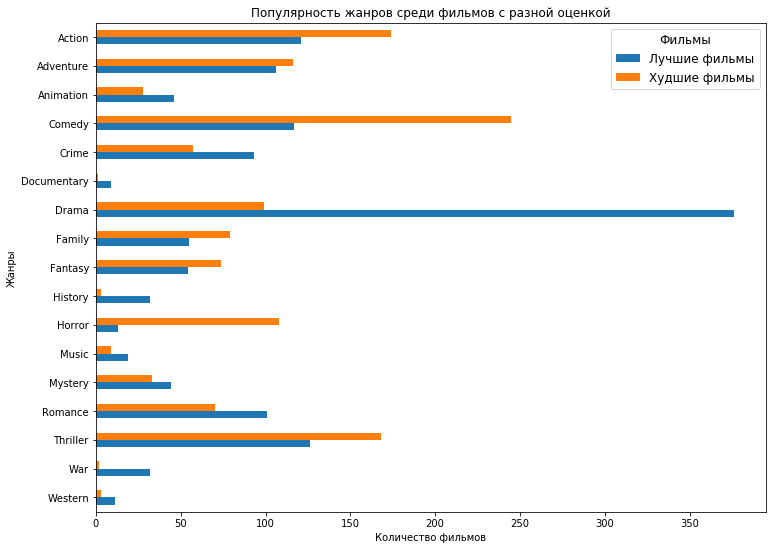

In [337]:
genres_popularity = df[['genres', 'vote_average']]

pattern = re.compile(r'\"name\":\s\"(\w*)\"')

best_genres = genres_popularity[genres_popularity.vote_average >= 6.8].genres.reset_index(drop=True)
best_genres = best_genres.apply(lambda x: re.findall(pattern, x)).sum()
best_genres = Counter(best_genres)

worst_genres = genres_popularity[genres_popularity.vote_average <= 5.7].genres.reset_index(drop=True)
worst_genres = worst_genres.apply(lambda x: re.findall(pattern, x)).sum()
worst_genres = Counter(worst_genres)

bg = pd.DataFrame.from_dict(best_genres, orient='index', columns=['best_count'])
wg = pd.DataFrame.from_dict(worst_genres, orient='index', columns=['worst_count'])

genres = pd.concat([bg, wg], axis=1).sort_index(ascending=False)
ax = genres.plot(kind='barh')
ax.set_title('Популярность жанров среди фильмов с разной оценкой')
ax.set_xlabel('Количество фильмов')
ax.set_ylabel('Жанры')
legend = plt.legend(title="Фильмы", title_fontsize='large', labels=['Лучшие фильмы', 'Худшие фильмы'], fontsize='large')
plt.show()

### <center>3.2. Столбчатая диаграмма с накоплением
#### Участвующие переменные:
    1. Бюджет фильма.
    2. Итоговая выручка.
    3. Коэффициент доходности (отношение итоговой выручки к затраченному бюджету).
#### Цель визуализации:
    Определить доходность киноиндустрии
#### Гипотезы:
    С 2012 по 2016 год коэффициент доходности не падал ниже 2.9, а в предыдущие 11 лет держался в промежутке
    между 2.4 и 2.9, что позволяет судить о том, что а) снимать фильмы в целом выгодно, б) в последние годы их
    прибыльность растёт

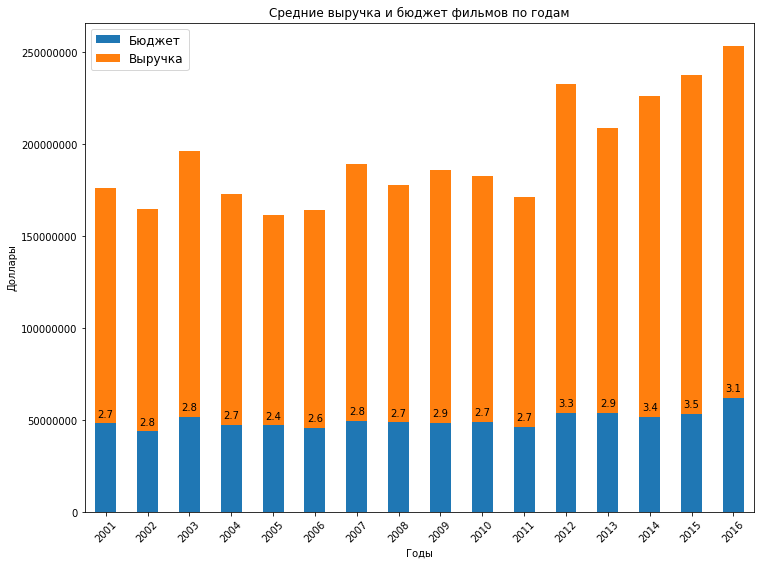

In [338]:
mean_by_year = df.groupby(pd.DatetimeIndex(df['release_date']).year).mean()
mean_by_year['ratio'] = mean_by_year['revenue'] / mean_by_year['budget']
ax = mean_by_year[['budget', 'revenue']].plot(kind='bar', rot=45, stacked=True)
      
ax.set_title('Средние выручка и бюджет фильмов по годам')
ax.set_xlabel('Годы')
ax.set_ylabel('Доллары')
ax.ticklabel_format(style='plain', axis='y')
legend = plt.legend(labels=['Бюджет', 'Выручка'], fontsize='large')

rects = ax.patches

labels = list(mean_by_year['ratio'])

for i, (rect, label) in enumerate(zip(rects, labels)):
    height = rect.get_height()
    label = labels[i]
    ax.text(rect.get_x() + rect.get_width()/2, 
            rect.get_y() + height*1.05, 
            '{:.1f}'.format(label), 
            ha='center', 
            va='bottom')
plt.show()